In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [8]:
import numpy as np
df['Cabin_Null'] = np.where(df['Cabin'].isnull(), 1, 0)

df['Cabin_Null'].mean()

0.7710437710437711

In [9]:
df.shape

(891, 13)

In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_Null'],
      dtype='object')

In [11]:
df.groupby(['Survived'])['Cabin_Null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_Null, dtype: float64

In [12]:
df = pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])

In [13]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [14]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [15]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)

In [16]:
median = df.Age.median()
median

28.0

In [17]:
impute_nan(df, 'Age' , median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [18]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [13]:
import matplotlib.pyplot as plt

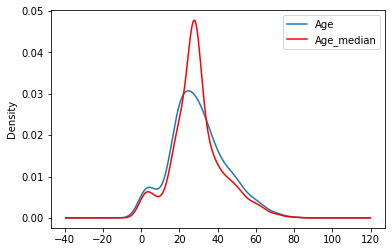

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols = ['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [2]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [3]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [4]:
df['Age'].isnull().sum()

177

In [5]:
df['Age'].dropna().sample()

802    11.0
Name: Age, dtype: float64

In [8]:
def impute_nan(df, variable, median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable+'_random'] = random_sample

In [6]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [9]:
median = df.Age.median()

In [10]:
impute_nan(df, "Age", median)

In [11]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [12]:
print(df['Age'].std())
print(df['Age_median'].std())
print(df['Age_random'].std())

14.526497332334044
13.019696550973194
14.5636540895687


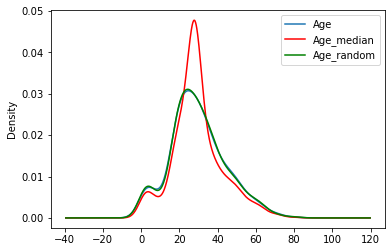

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [3]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
import numpy as np
df['Age_NAN']=np.where(df['Age'].isnull(), 1, 0)

In [7]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [ ]:
import feature_engine.missing_data_imputers as mdi
titanic = mdi.RandomSampleImputer(variables=["Age"],random_state=0).fit_transform(titanic)


In [8]:
df['Age'].fillna(df.Age.median(), inplace = True)

In [9]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [27]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

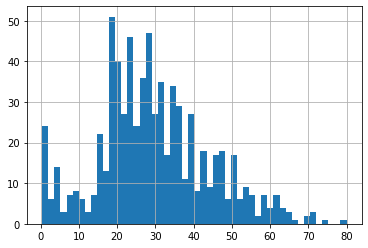

In [28]:
df.Age.hist(bins=50)

In [29]:
df.Age.mean()

29.69911764705882

In [30]:
extreme = df.Age.mean()+3*df.Age.std()

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

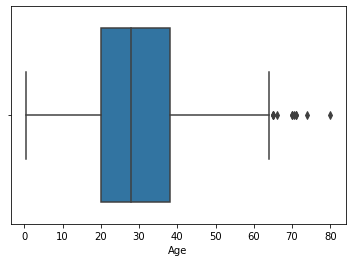

In [31]:
import seaborn as sns
sns.boxplot('Age', data = df)

In [32]:
def impute_nan(df, variable, median, extreme):
    df[variable+"_end_distribution"] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True)

In [33]:
impute_nan(df,'Age',df.Age.median(), extreme)

In [35]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

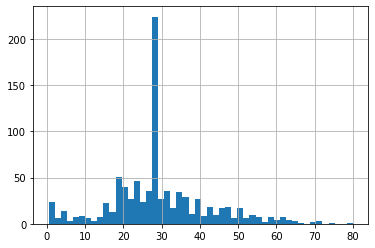

In [36]:
df['Age'].hist(bins=50)

<AxesSubplot:>

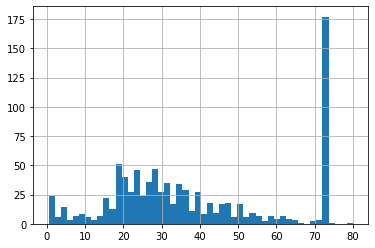

In [37]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

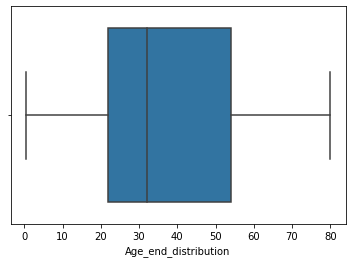

In [38]:
sns.boxplot('Age_end_distribution',data=df)

In [1]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [31]:
def impute_nan(df, variable):
    df[variable+"_hundred"] = df[variable].fillna(100)
    df[variable+"_zero"] = df[variable].fillna(0)
    df[variable+"_arbitary"] = df[variable].fillna(45)

In [32]:
impute_nan(df, 'Age')

In [33]:
df.head(10)

,Survived,Age,Fare,Age_hundred,Age_zero,Age_arbitary
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0
5,0,NaN,8.4583,100.0,0.0,45.0
6,0,54.0,51.8625,54.0,54.0,54.0
7,0,2.0,21.0750,2.0,2.0,2.0
8,1,27.0,11.1333,27.0,27.0,27.0
9,1,14.0,30.0708,14.0,14.0,14.0


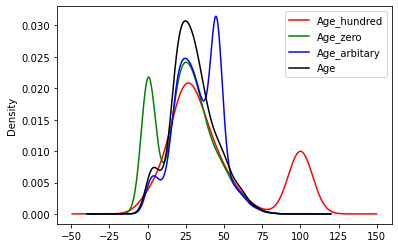

In [34]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
df.Age_hundred.plot(kind='kde', ax=ax, color='red')
df.Age_zero.plot(kind='kde', ax=ax, color='green')
df.Age_arbitary.plot(kind='kde', ax=ax, color='blue')
df.Age.plot(kind='kde', ax=ax, color='black')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [35]:
print(df['Age'].std())
print(df['Age_hundred'].std())
print(df['Age_zero'].std())
print(df['Age_arbitary'].std())

14.526497332334044
30.930372890173594
17.596074065915886
14.365353645225769


In [38]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [39]:
df = pd.read_csv('houseprices.csv', usecols = ['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice'])

In [40]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [41]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [43]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

<AxesSubplot:xlabel='BsmtQual'>

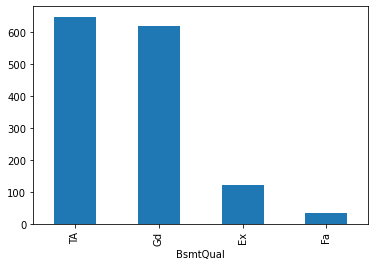

In [44]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending = False).plot.bar()

<AxesSubplot:>

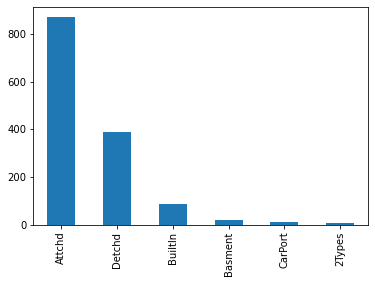

In [45]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

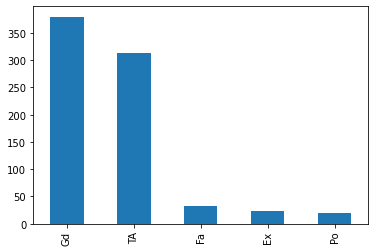

In [47]:
df['FireplaceQu'].value_counts().plot.bar()

In [48]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [49]:
def impute_nan(df, variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category, inplace = True) 

In [50]:
for feature in ['BsmtQual', 'FireplaceQu', 'GarageType']:
    impute_nan(df, feature)

In [51]:
df.head(10)

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000
5,Gd,Gd,Attchd,143000
6,Ex,Gd,Attchd,307000
7,Gd,TA,Attchd,200000
8,TA,TA,Detchd,129900
9,TA,TA,Attchd,118000


In [53]:
df=pd.read_csv('houseprices.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [55]:
import numpy as np
df['BsmtQual_NAN'] = np.where(df['BsmtQual'].isnull(), 1, 0)

In [60]:
freq_value = df['BsmtQual'].mode()[0]

In [62]:
df['BsmtQual'].fillna(freq_value, inplace = True)

In [63]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_NAN
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [64]:
df['BsmtQual'].isnull().sum()

0

In [65]:
df=pd.read_csv('houseprices.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [67]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

In [68]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [71]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [72]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)

In [73]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


In [1]:
 import datetime

In [2]:
today_date = datetime.datetime.today()

In [3]:
today_date

datetime.datetime(2022, 7, 5, 17, 43, 30, 344360)

In [5]:
today_date-datetime.timedelta(1)

datetime.datetime(2022, 7, 4, 17, 43, 30, 344360)

In [7]:
days = [today_date-datetime.timedelta(x) for x in range(0, 15)]

In [8]:
days

[datetime.datetime(2022, 7, 5, 17, 43, 30, 344360),
 datetime.datetime(2022, 7, 4, 17, 43, 30, 344360),
 datetime.datetime(2022, 7, 3, 17, 43, 30, 344360),
 datetime.datetime(2022, 7, 2, 17, 43, 30, 344360),
 datetime.datetime(2022, 7, 1, 17, 43, 30, 344360),
 datetime.datetime(2022, 6, 30, 17, 43, 30, 344360),
 datetime.datetime(2022, 6, 29, 17, 43, 30, 344360),
 datetime.datetime(2022, 6, 28, 17, 43, 30, 344360),
 datetime.datetime(2022, 6, 27, 17, 43, 30, 344360),
 datetime.datetime(2022, 6, 26, 17, 43, 30, 344360),
 datetime.datetime(2022, 6, 25, 17, 43, 30, 344360),
 datetime.datetime(2022, 6, 24, 17, 43, 30, 344360),
 datetime.datetime(2022, 6, 23, 17, 43, 30, 344360),
 datetime.datetime(2022, 6, 22, 17, 43, 30, 344360),
 datetime.datetime(2022, 6, 21, 17, 43, 30, 344360)]

In [9]:
import pandas as pd
date = pd.DataFrame(days)

In [11]:
date.columns = ["Day"]

In [12]:
date

,Day
0,2022-07-05 17:43:30.344360
1,2022-07-04 17:43:30.344360
2,2022-07-03 17:43:30.344360
3,2022-07-02 17:43:30.344360
4,2022-07-01 17:43:30.344360
5,2022-06-30 17:43:30.344360
6,2022-06-29 17:43:30.344360
7,2022-06-28 17:43:30.344360
8,2022-06-27 17:43:30.344360
9,2022-06-26 17:43:30.344360


In [18]:
date['weekday'] = date['Day'].dt.day_name()

In [19]:
date

,Day,weekday
0,2022-07-05 17:43:30.344360,Tuesday
1,2022-07-04 17:43:30.344360,Monday
2,2022-07-03 17:43:30.344360,Sunday
3,2022-07-02 17:43:30.344360,Saturday
4,2022-07-01 17:43:30.344360,Friday
5,2022-06-30 17:43:30.344360,Thursday
6,2022-06-29 17:43:30.344360,Wednesday
7,2022-06-28 17:43:30.344360,Tuesday
8,2022-06-27 17:43:30.344360,Monday
9,2022-06-26 17:43:30.344360,Sunday
